In [1]:
import numpy as np
from tensorflow import keras
import tensorflow as tf

In [2]:
mst = tf.keras.datasets.cifar10
(X_train,y_train),(X_test,y_test) = mst.load_data()
print(X_train.shape)
print(X_train.shape)

(50000, 32, 32, 3)
(50000, 32, 32, 3)


In [3]:
# X_train = X_train.reshape((-1,3072))
# X_test = X_test.reshape((-1,3072))

In [4]:
X_train = X_train/255
X_test = X_test/255

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.layers import BatchNormalization

In [7]:
model = keras.Sequential()

# model.add(keras.layers.Dense(512, input_shape=(3072,), activation="relu"))
# model.add(keras.layers.Dense(256,activation='relu'))
# model.add(keras.layers.Dense(10,activation='softmax'))
#-------------------------------------------------------
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
#-------------------------------------------------------
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics='accuracy')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [8]:
results = model.fit(X_train,y_train,shuffle=True,epochs=100,batch_size=64,validation_data =(X_test,y_test))

Epoch 1/100
782/782 [==============================] - 20s 11ms/step - loss: 2.0132 - accuracy: 0.3270 - val_loss: 1.6978 - val_accuracy: 0.3971
Epoch 2/100
782/782 [==============================] - 8s 10ms/step - loss: 1.5239 - accuracy: 0.4422 - val_loss: 1.5203 - val_accuracy: 0.4550
Epoch 3/100
782/782 [==============================] - 8s 10ms/step - loss: 1.3827 - accuracy: 0.4990 - val_loss: 1.3274 - val_accuracy: 0.5225
Epoch 4/100
782/782 [==============================] - 8s 10ms/step - loss: 1.2866 - accuracy: 0.5347 - val_loss: 1.2007 - val_accuracy: 0.5637
Epoch 5/100
782/782 [==============================] - 10s 13ms/step - loss: 1.2037 - accuracy: 0.5664 - val_loss: 1.2541 - val_accuracy: 0.5546
Epoch 6/100
782/782 [==============================] - 8s 10ms/step - loss: 1.1556 - accuracy: 0.5860 - val_loss: 1.1428 - val_accuracy: 0.5930
Epoch 7/100
782/782 [==============================] - 9s 11ms/step - loss: 1.1114 - accuracy: 0.6035 - val_loss: 1.0210 - val_accurac

Text(0.5, 0, 'accuracy')

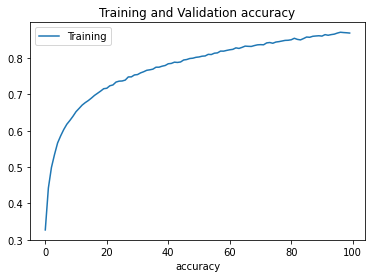

In [9]:
import matplotlib.pyplot as plt
plt.plot(results.history['accuracy'])
#plt.plot(results.history['val_laccuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')
plt.xlabel('accuracy')

Text(0, 0.5, 'loss')

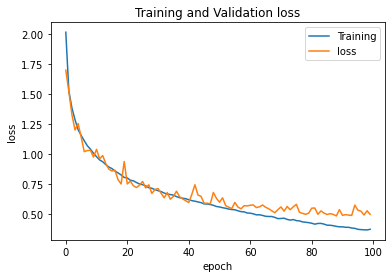

In [10]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training', 'loss'])
plt.title('Training and Validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')